k= 0.900458420439 b= 0.831055638877
cost：1
求解的拟合直线为:
y=0.9x+0.83


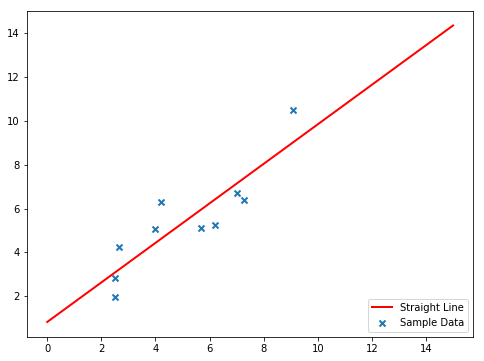

In [50]:
# -*- conding: utf-8 -*-
##最小二乘法

import numpy as np   ##科学计算库 
import scipy as sp   ##在numpy基础上实现的部分算法库
import matplotlib.pyplot as plt  ##绘图库
from scipy.optimize import leastsq  ##引入最小二乘法算法

'''
     设置样本数据，真实数据需要在这里处理
'''
##样本数据(Xi,Yi)，需要转换成数组(列表)形式
Xi=np.array([6.19,2.51,7.29,7.01,5.7,2.66,3.98,2.5,9.1,4.2,])
Yi=np.array([5.25,2.83,6.41,6.71,5.1,4.23,5.05,1.98,10.5,6.3,])


'''
    设定拟合函数和偏差函数
    函数的形状确定过程：
    1.先画样本图像
    2.根据样本图像大致形状确定函数形式(直线、抛物线、正弦余弦等)
'''

##需要拟合的函数func :指定函数的形状
def func(p,x):
    k,b=p
    return k*x+b


##偏差函数：x,y都是列表:这里的x,y跟上面的Xi,Yi中是一一对应的
def error(p,x,y):
    return func(p,x)-y


'''
    主要部分：附带部分说明
    1.leastsq函数的返回值tuple，第一个元素是求解结果，第二个是求解的代价值(个人理解)
    2.官网的原话（第二个值）：Value of the cost function at the solution
    3.实例：Para=>(array([ 0.61349535,  1.79409255]), 3)
    4.返回值元组中第一个值的数量跟需要求解的参数的数量一致
'''

#k,b的初始值，可以任意设定,经过几次试验，发现p0的值会影响cost的值：Para[1]
p0=[1,20]

#把error函数中除了p0以外的参数打包到args中(使用要求)
Para=leastsq(error,p0,args=(Xi,Yi))

#读取结果
k,b=Para[0]
print("k=",k,"b=",b)
print("cost："+str(Para[1]))
print("求解的拟合直线为:")
print("y="+str(round(k,2))+"x+"+str(round(b,2)))

'''
   绘图，看拟合效果.
 
'''

#画样本点
plt.figure(figsize=(8,6))
# fig = plt.figure(figsize=(8,6)) ##指定图像比例： 8：6
# ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model');
plt.scatter(Xi,Yi,marker='x',label="Sample Data",linewidth=2) 

#画拟合直线
x=np.linspace(0,15,100) ##在0-15直接画100个连续点
y=k*x+b ##函数式
plt.plot(x,y,color="red",label="Straight Line",linewidth=2) 
plt.legend(loc='lower right') #绘制图例
plt.show()